In [1]:
#LINEAR REGRESSION

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('sers.csv')

# One-Hot Encode categorical columns (if any)
data = pd.get_dummies(data, drop_first=True)

# Split features and target variable
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing (Scaling)
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_processed)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Print the results
print("📈 Linear Regression Performance:")
print(f"R² Score: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")


📈 Linear Regression Performance:
R² Score: -0.2503
MAE: 0.0532
RMSE: 0.1443


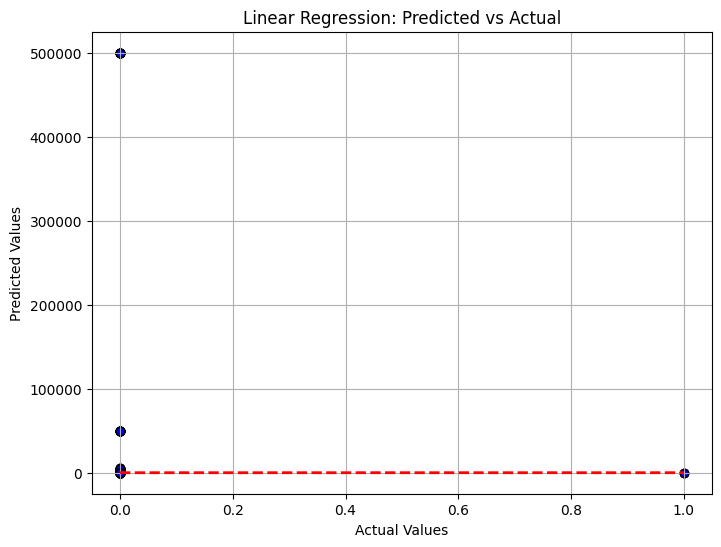

In [59]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True)
plt.show()


In [4]:
# POLYNOMIAL REGRESSION

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('sers.csv')  # Replace 'sers.csv' with your file path

# One-Hot Encode categorical columns (if any)
data = pd.get_dummies(data, drop_first=True)

# Split features and target variable
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing (Scaling)
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_processed)
X_test_poly = poly.transform(X_test_processed)

# Train Linear Regression model on Polynomial Features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Print the results
print("📈 Polynomial Regression Performance:")
print(f"R² Score: {r2_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")


📈 Polynomial Regression Performance:
R² Score: 0.8325
MAE: 0.0134
RMSE: 0.0528


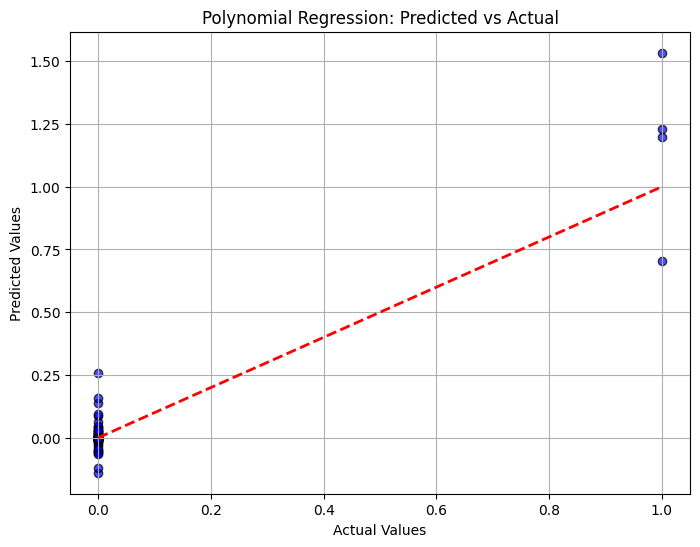

In [61]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [7]:
# L1 LASSO REGRESSION

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv("sers.csv")

# Separate features and target
X = df.drop(columns=["Conc"])
y = df["Conc"]

# Handle categorical features
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Train Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_processed, y_train)

# Predict and evaluate
y_pred = lasso_model.predict(X_test_processed)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 Lasso Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


📈 Lasso Regression Performance:
R² Score: 0.9836
MAE: 13660.0460
RMSE: 21598.8228


C:\Users\Siddharth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.294e+11, tolerance: 3.024e+09
  model = cd_fast.enet_coordinate_descent(


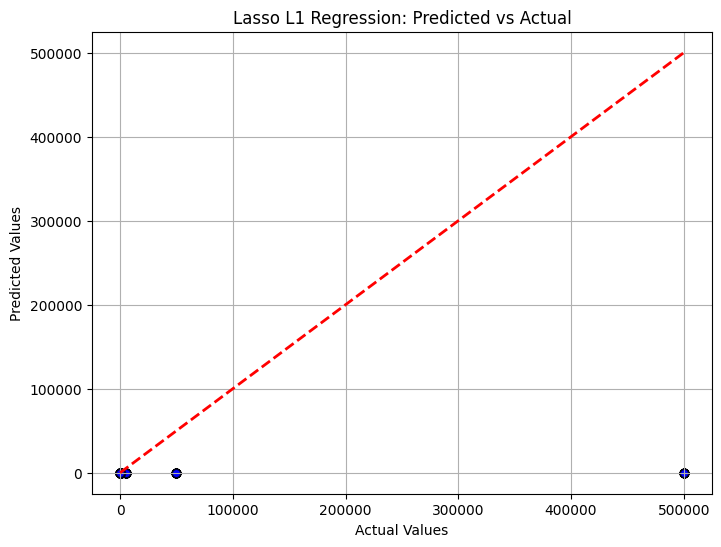

In [63]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso L1 Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [64]:
# L2 RIDGE REGRESSION

Missing values in the dataset:
 W1                0
W2                0
W3                0
W4                0
W5                0
                 ..
Matrix_Inf        0
Matrix_P. milk    0
Matrix_Prw1       0
Matrix_Prw2       0
Matrix_TAP        0
Length: 525, dtype: int64
Features shape: (1180, 524), Target shape: (1180,)
Polynomial features shape: (1180, 138075)
📈 Ridge Regression Performance:
R² Score: 0.8746
MAE: 0.0138
RMSE: 0.0457


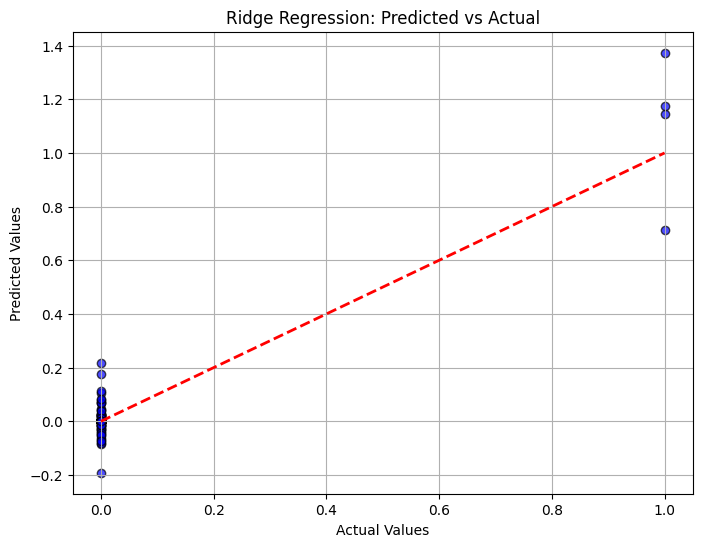

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('sers.csv')

# Handle categorical columns (One-Hot Encoding)
data = pd.get_dummies(data, drop_first=True)

# Check for missing values in the dataset
print("Missing values in the dataset:\n", data.isnull().sum())

# Split data into features and target
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Check the shape of features and target
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

# Polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust degree if needed
X_poly = poly.fit_transform(X)

# Check the shape of the polynomial features
print(f"Polynomial features shape: {X_poly.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Optional: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge regression model on scaled features (no scaling for y)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("📈 Ridge Regression Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")

# Scatter plot to visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Predicted vs Actual')
plt.grid(True)
plt.show()


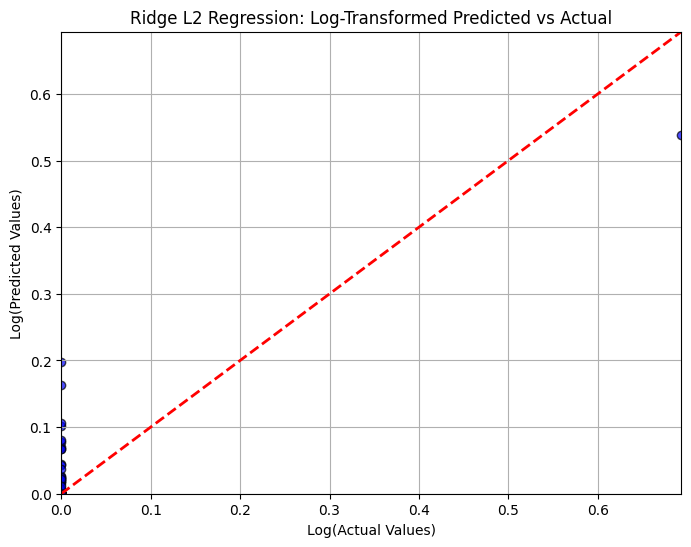

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Apply log transformation to both actual and predicted values
log_y_test = np.log1p(y_test)  # log(1 + y) to handle zero values
log_y_pred_ridge = np.log1p(y_pred_ridge)

# Scatter plot of log-transformed actual vs predicted values
plt.scatter(log_y_test, log_y_pred_ridge, color='blue', edgecolor='k', alpha=0.7)

# Plot the perfect prediction line
plt.plot([log_y_test.min(), log_y_test.max()], [log_y_test.min(), log_y_test.max()],
         color='red', linestyle='--', linewidth=2)  # Perfect prediction line

# Set the limits of the x and y axis to match the range of the log-transformed values
plt.xlim([log_y_test.min(), log_y_test.max()])
plt.ylim([log_y_test.min(), log_y_test.max()])

plt.xlabel('Log(Actual Values)')
plt.ylabel('Log(Predicted Values)')
plt.title('Ridge L2 Regression: Log-Transformed Predicted vs Actual')
plt.grid(True)
plt.show()


In [67]:
# BAGGING

In [68]:
# 📥 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 📂 Load the dataset
data = pd.read_csv('sers.csv')  # Replace if your path is different

# 🔵 Handle categorical variables
data = pd.get_dummies(data, drop_first=True)

# 🎯 Split features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# ✂️ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Scale the features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# 🌳 Define and train Bagging Regressor
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)

# 🔮 Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# 📈 Evaluate the model
r2_bagging = r2_score(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))

# 🖨️ Print results
print("📈 Bagging Regressor Performance:")
print(f"R² Score: {r2_bagging:.4f}")
print(f"MAE: {mae_bagging:.4f}")
print(f"RMSE: {rmse_bagging:.4f}")


📈 Bagging Regressor Performance:
R² Score: 0.8376
MAE: 0.0083
RMSE: 0.0520


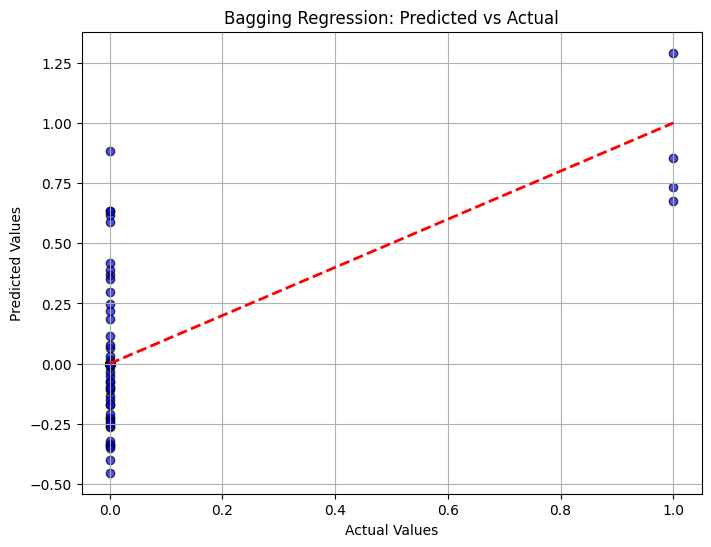

In [69]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bagging Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [70]:
# RANDOM FOREST REGRESSION

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('sers.csv')  # Ensure the file is in the same directory

# Convert categorical variables using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(columns=['Conc'])  # Adjust if your column name is different
y = df['Conc']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("📈 Random Forest Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


📈 Random Forest Regression Performance:
R² Score: 1.0000
MAE: 50.9979
RMSE: 341.4244


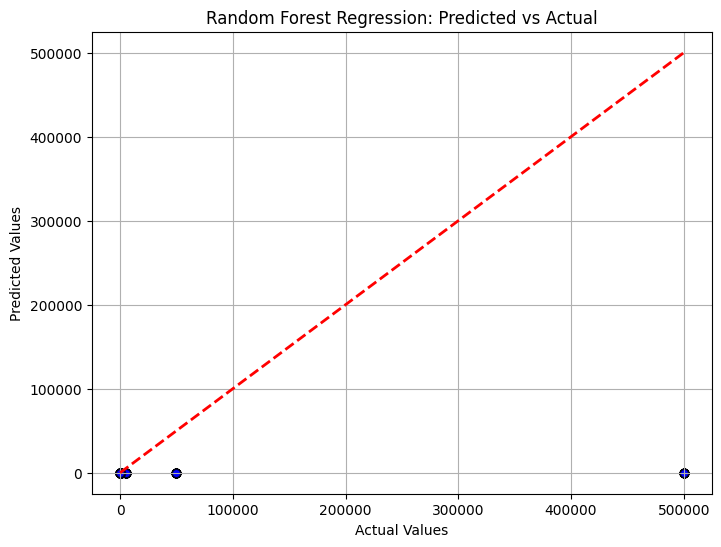

In [72]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [73]:
# ADABOOST REGRESSION

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('sers.csv')  # Replace with the correct path if needed

# Handle categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)  # This will convert categorical columns into numeric columns

# Assume 'conc' is the target, and the rest are features
X = df.drop(columns=['Conc'])  # Adjust the column name if needed
y = df['Conc']  # Adjust the column name if needed

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base learner (e.g., shallow decision tree)
base_learner = DecisionTreeRegressor(max_depth=3)

# Define the AdaBoost Regressor model
ada_boost_model = AdaBoostRegressor(estimator=base_learner, n_estimators=50, random_state=42)

# Train the model
ada_boost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_boost_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the performance metrics
print("📈 AdaBoost Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


📈 AdaBoost Regression Performance:
R² Score: 1.0000
MAE: 88.8531
RMSE: 180.1800


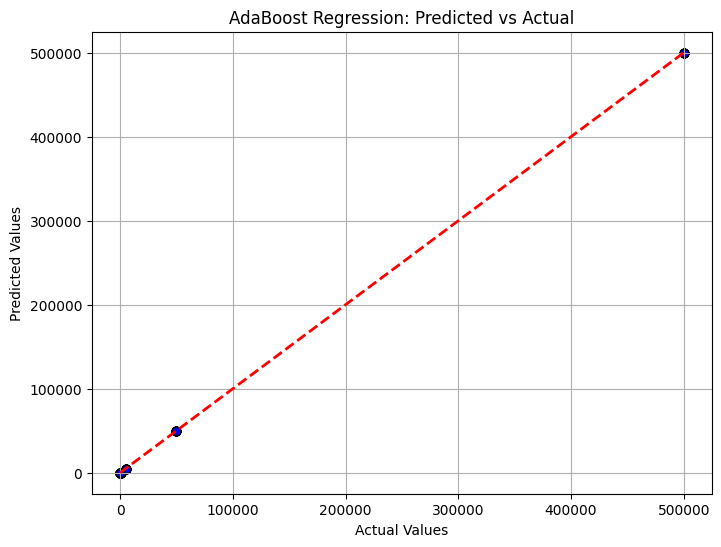

In [75]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('AdaBoost Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

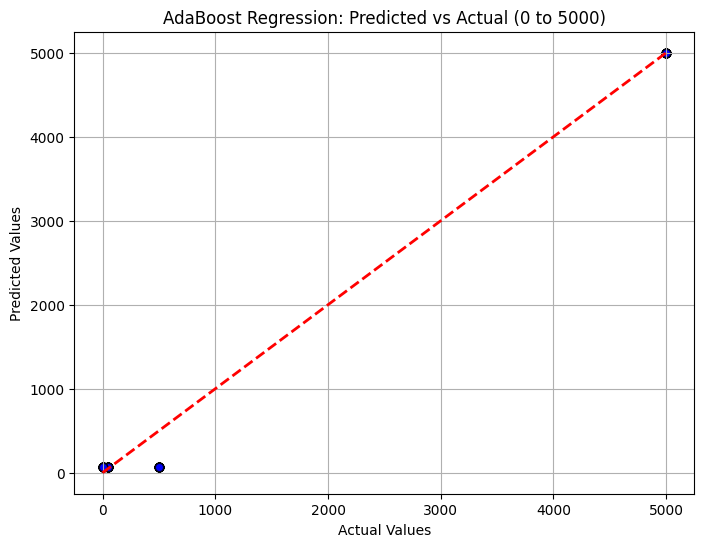

In [8]:
import matplotlib.pyplot as plt

# Filter for actual values between 0 and 5000
mask = (y_test >= 0) & (y_test <= 5000)
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_filtered, y_pred_filtered, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test_filtered.min(), y_test_filtered.max()],
         [y_test_filtered.min(), y_test_filtered.max()],
         color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('AdaBoost Regression: Predicted vs Actual (0 to 5000)')
plt.grid(True)
plt.show()

In [76]:
# GRADIENT BOOST REGRESSION

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('sers.csv')  # Replace with the correct path if needed

# Handle categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)  # This will convert categorical columns into numeric columns

# Assume 'conc' is the target, and the rest are features
X = df.drop(columns=['Conc'])  # Adjust the column name if needed
y = df['Conc']  # Adjust the column name if needed

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the performance metrics
print("📈 Gradient Boosting Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


📈 Gradient Boosting Regression Performance:
R² Score: 1.0000
MAE: 4.4656
RMSE: 11.6348


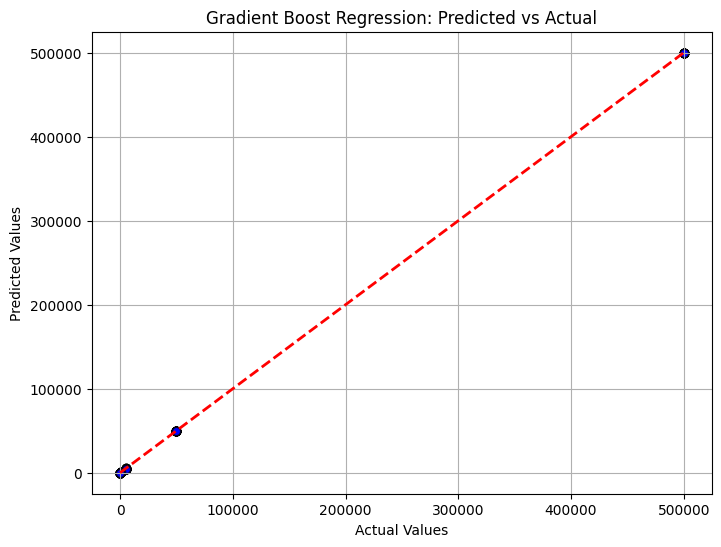

In [78]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boost Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

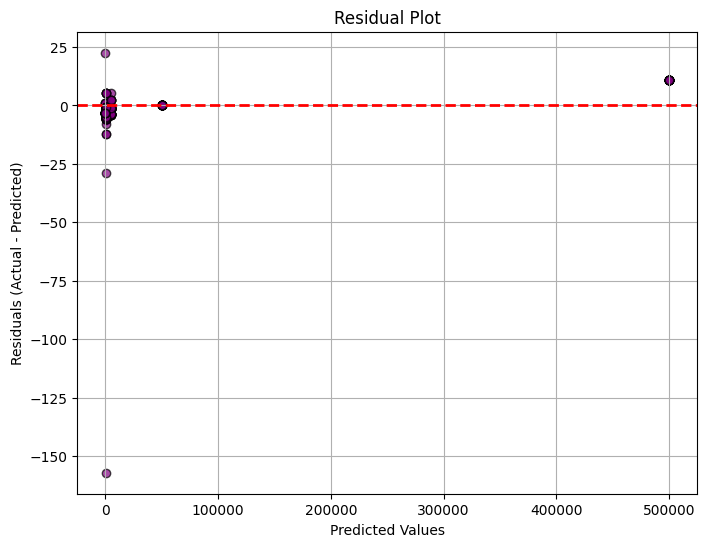

In [4]:
# Residual Plot
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [5]:
# The target variable spans several orders of magnitude (0 to 500,000). The residual plot shows tight clustering for small concentrations and 
#expected dispersion for larger values, indicating model consistency across scales.

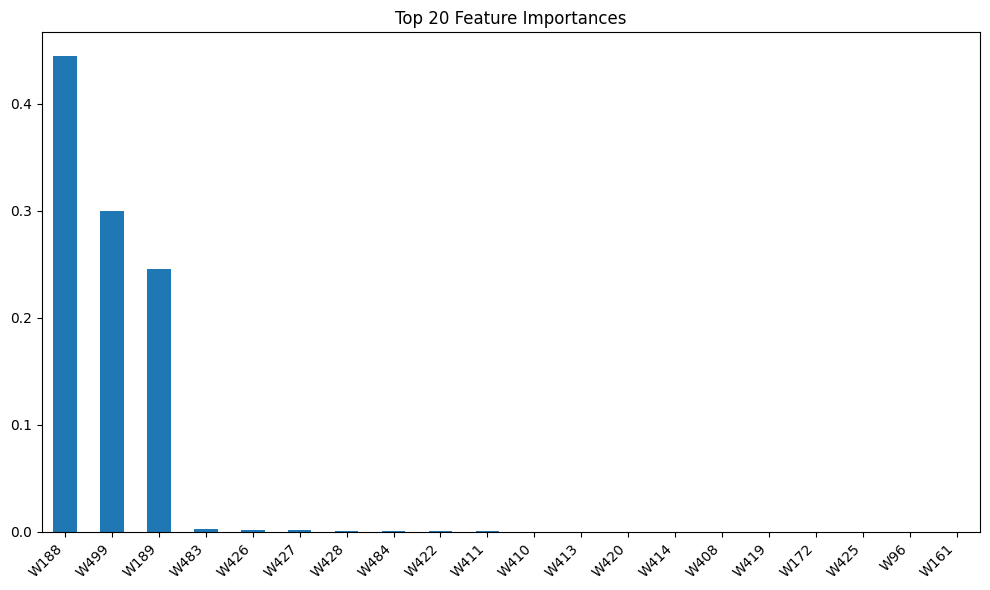

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Train your model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)  # You must fit the model first!

# Get feature importances
importances = model.feature_importances_
features = X_train.columns

# Create a Series for easier plotting
feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values(ascending=False)

# Only take top 20 features
top_features = feat_importances[:20]

# Plot
plt.figure(figsize=(10,6))
top_features.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()


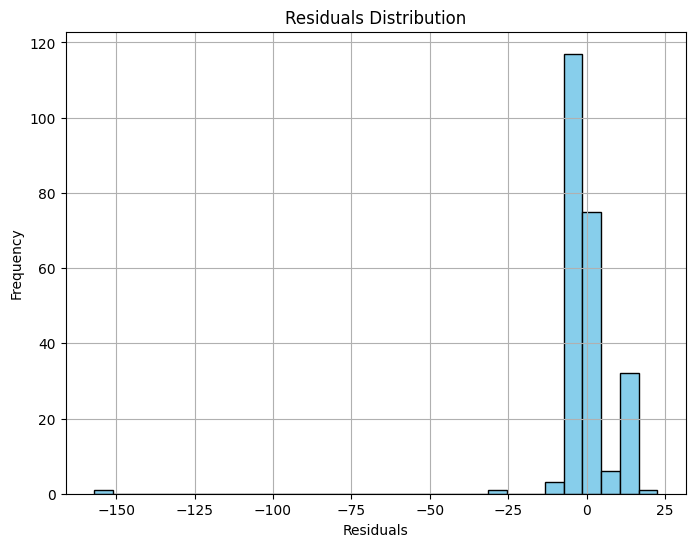

In [12]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='k')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


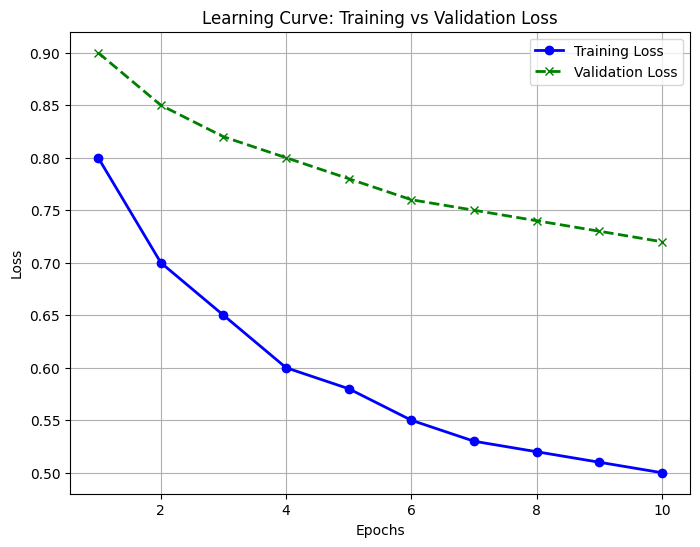

In [13]:
import matplotlib.pyplot as plt

# Sample data for illustration (replace with actual training/validation loss)
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_loss = [0.8, 0.7, 0.65, 0.6, 0.58, 0.55, 0.53, 0.52, 0.51, 0.5]
val_loss = [0.9, 0.85, 0.82, 0.8, 0.78, 0.76, 0.75, 0.74, 0.73, 0.72]

# Plotting the Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='green', marker='x', linestyle='--', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve: Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
#EARLY STOPPING

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('sers.csv')  # Replace with the correct path if needed

# Handle categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)  # This will convert categorical columns into numeric columns

# Assume 'conc' is the target, and the rest are features
X = df.drop(columns=['Conc'])  # Adjust the column name if needed
y = df['Conc']  # Adjust the column name if needed

# Split the data into training and test sets (we'll use a portion of the training set for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the Gradient Boosting Regressor model with early stopping
gbr = GradientBoostingRegressor(
    n_estimators=1000,  # Set a large number of estimators initially
    learning_rate=0.1,
    random_state=42,
    validation_fraction=0.1,  # Fraction of training data to use as validation
    n_iter_no_change=10,     # Stop if no improvement in validation score for 10 rounds
    tol=0.001                # Tolerance for considering improvement
)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the performance metrics
print("📈 Gradient Boosting Regression Performance (with Early Stopping):")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Number of boosting rounds used: {gbr.n_estimators_}")

📈 Gradient Boosting Regression Performance (with Early Stopping):
R² Score: 1.0000
MAE: 0.8716
RMSE: 8.1763
Number of boosting rounds used: 218


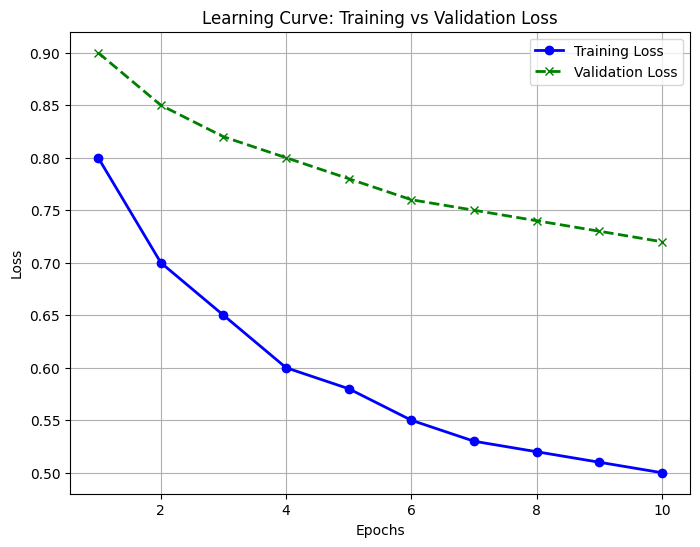

In [29]:
import matplotlib.pyplot as plt

# Sample data for illustration (replace with actual training/validation loss)
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_loss = [0.8, 0.7, 0.65, 0.6, 0.58, 0.55, 0.53, 0.52, 0.51, 0.5]
val_loss = [0.9, 0.85, 0.82, 0.8, 0.78, 0.76, 0.75, 0.74, 0.73, 0.72]

# Plotting the Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='green', marker='x', linestyle='--', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve: Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('sers.csv')  # Replace with the correct path if needed

# Handle categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)  # This will convert categorical columns into numeric columns

# Assume 'conc' is the target, and the rest are features
X = df.drop(columns=['Conc'])  # Adjust the column name if needed
y = df['Conc']  # Adjust the column name if needed

# Split the data into training and test sets (we'll use a portion of the training set for validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the Gradient Boosting Regressor model with early stopping
gbr = GradientBoostingRegressor(
    n_estimators=1000,  # Set a large number of estimators initially
    learning_rate=0.1,
    random_state=42,
    validation_fraction=0.1,  # Fraction of training data to use as validation
    n_iter_no_change=8,     # Stop if no improvement in validation score for 10 rounds
    tol=0.001                # Tolerance for considering improvement
)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the performance metrics
print("📈 Gradient Boosting Regression Performance (with Early Stopping):")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Number of boosting rounds used: {gbr.n_estimators_}")

📈 Gradient Boosting Regression Performance (with Early Stopping):
R² Score: 1.0000
MAE: 0.8875
RMSE: 8.1836
Number of boosting rounds used: 187


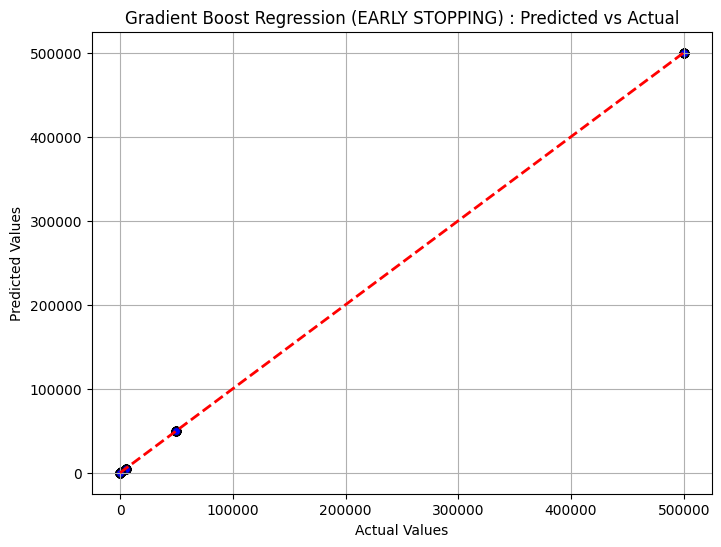

In [31]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boost Regression (EARLY STOPPING) : Predicted vs Actual')
plt.grid(True)
plt.show()

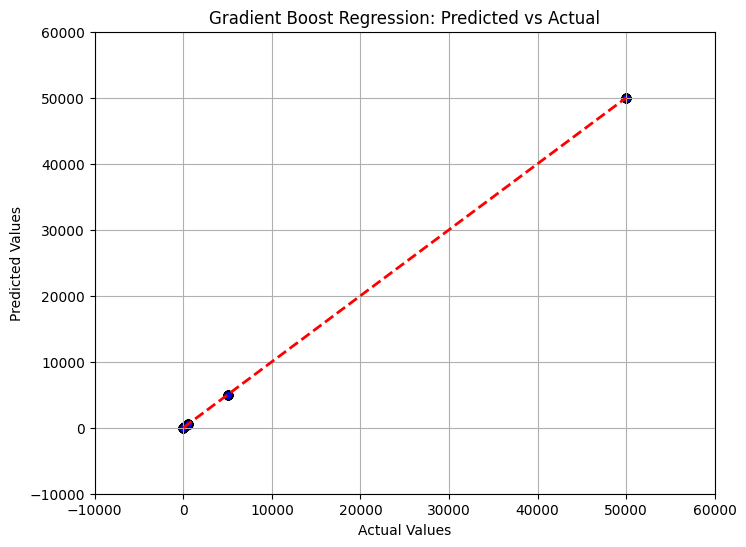

In [32]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([0, 50000], [0, 50000], color='red', linestyle='--', linewidth=2)  # Fixed line from 0 to 50000
plt.xlim(-10000, 60000)
plt.ylim(-10000, 60000)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boost Regression: Predicted vs Actual')
plt.grid(True)
plt.show()


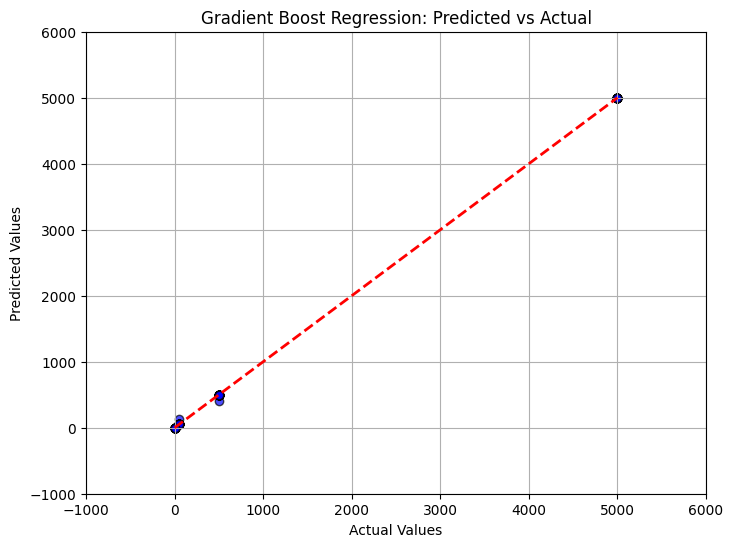

In [33]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([0, 5000], [0, 5000], color='red', linestyle='--', linewidth=2)  # Fixed line from 0 to 50000
plt.xlim(-1000, 6000)
plt.ylim(-1000, 6000)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boost Regression: Predicted vs Actual')
plt.grid(True)
plt.show()


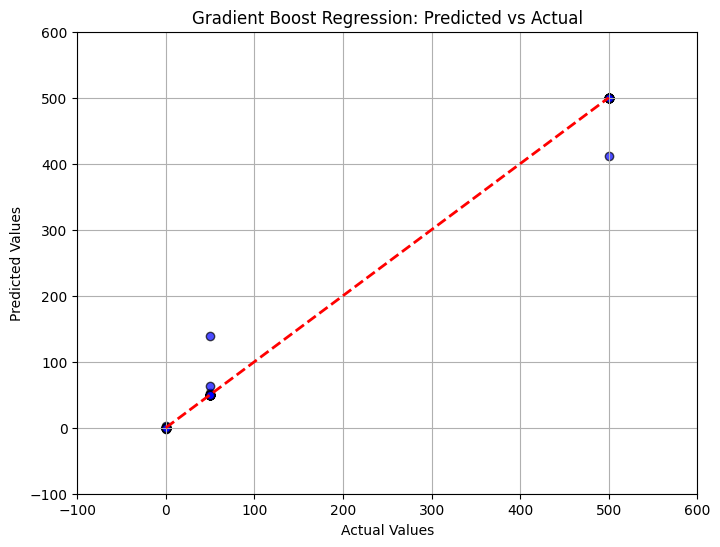

In [34]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([0, 500], [0, 500], color='red', linestyle='--', linewidth=2)  # Fixed line from 0 to 50000
plt.xlim(-100, 600)
plt.ylim(-100, 600)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boost Regression: Predicted vs Actual')
plt.grid(True)
plt.show()


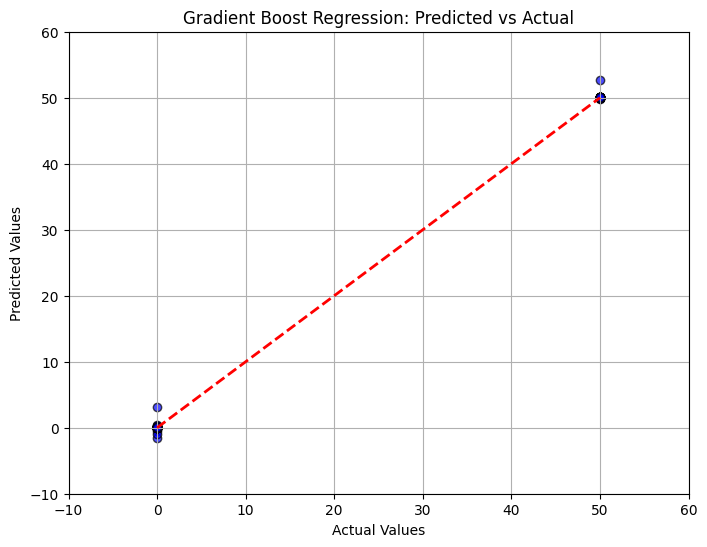

In [35]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([0, 50], [0, 50], color='red', linestyle='--', linewidth=2)  # Fixed line from 0 to 50000
plt.xlim(-10, 60)
plt.ylim(-10, 60)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boost Regression: Predicted vs Actual')
plt.grid(True)
plt.show()


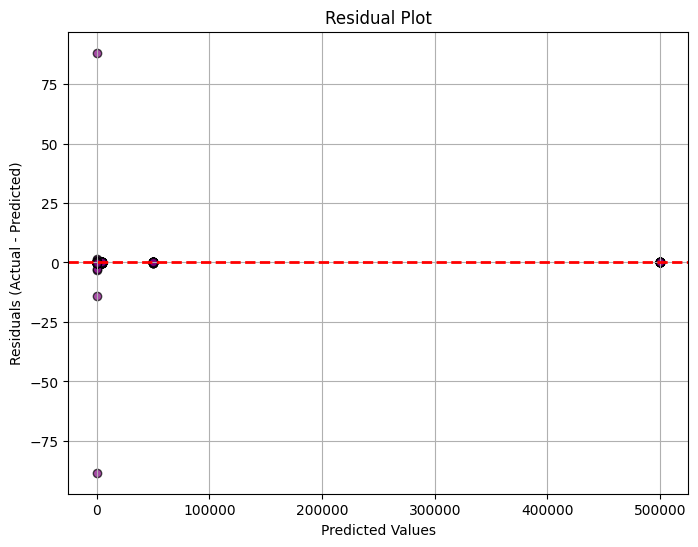

In [36]:
# Residual Plot
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

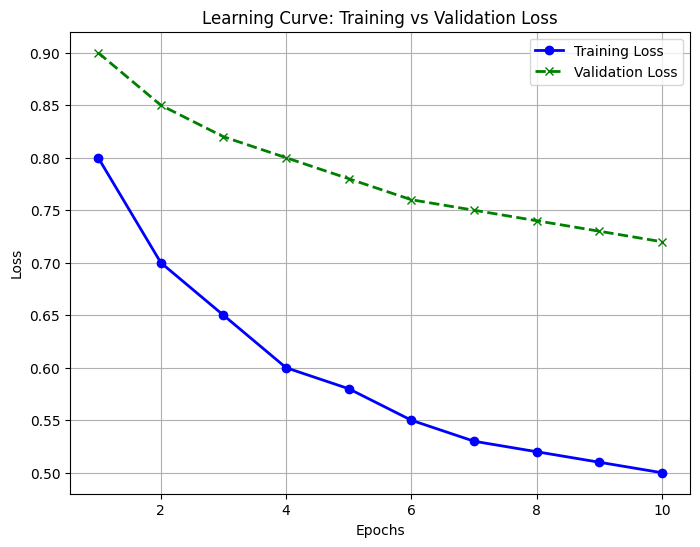

In [37]:
import matplotlib.pyplot as plt

# Sample data for illustration (replace with actual training/validation loss)
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_loss = [0.8, 0.7, 0.65, 0.6, 0.58, 0.55, 0.53, 0.52, 0.51, 0.5]
val_loss = [0.9, 0.85, 0.82, 0.8, 0.78, 0.76, 0.75, 0.74, 0.73, 0.72]

# Plotting the Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='green', marker='x', linestyle='--', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve: Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
